# Maven Halloween Challenge: Selecting the Best Candy Assortment

## Objective
For the Maven Halloween Challenge, we need to take a data-driven approach to become the most popular trick-or-treating house on the block. Using online votes ranking 85 types of candy, our task is to find the 3 treats to give out on Halloween that will guarantee trick-or-treaters of all tastes find something they'll love.

## Data Loading and Preparation

First, let's import the necessary libraries and load our data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
candy_data = pd.read_csv('candy-data.csv')

## Data Analysis

### Analyzing Candy Characteristics

Now, let's look at the distribution of different candy characteristics.

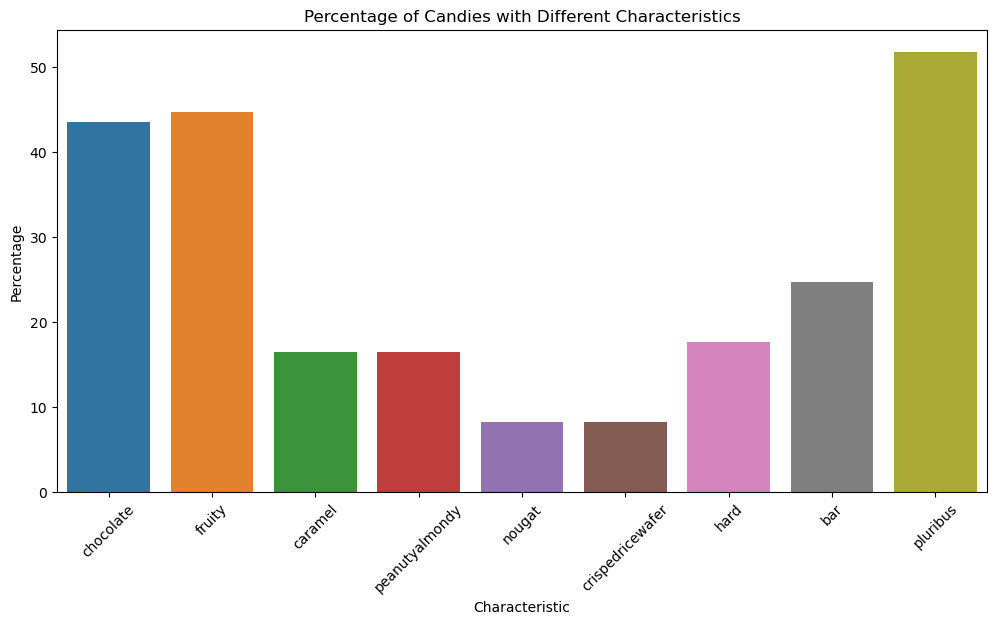

In [6]:

# Select relevant columns
characteristics = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']

# Calculate the percentage of candies with each characteristic
char_percentages = candy_data[characteristics].mean() * 100

# Create a bar plot of characteristic percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=char_percentages.index, y=char_percentages.values)
plt.title('Percentage of Candies with Different Characteristics')
plt.xlabel('Characteristic')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


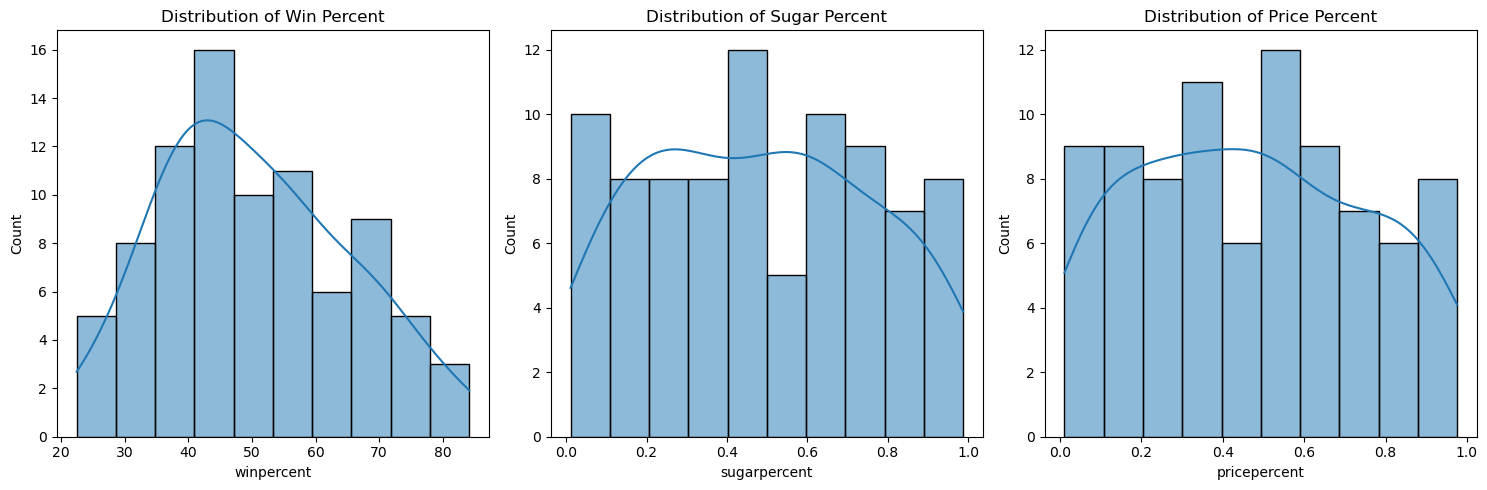

In [47]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(candy_data['winpercent'], bins=10, kde=True)
plt.title('Distribution of Win Percent')

plt.subplot(1, 3, 2)
sns.histplot(candy_data['sugarpercent'], bins=10, kde=True)
plt.title('Distribution of Sugar Percent')

plt.subplot(1, 3, 3)
sns.histplot(candy_data['pricepercent'], bins=10, kde=True)
plt.title('Distribution of Price Percent')

plt.tight_layout()
plt.show()


### Correlation between Characteristics and Win Percentage

Let's examine how different characteristics correlate with win percentage.

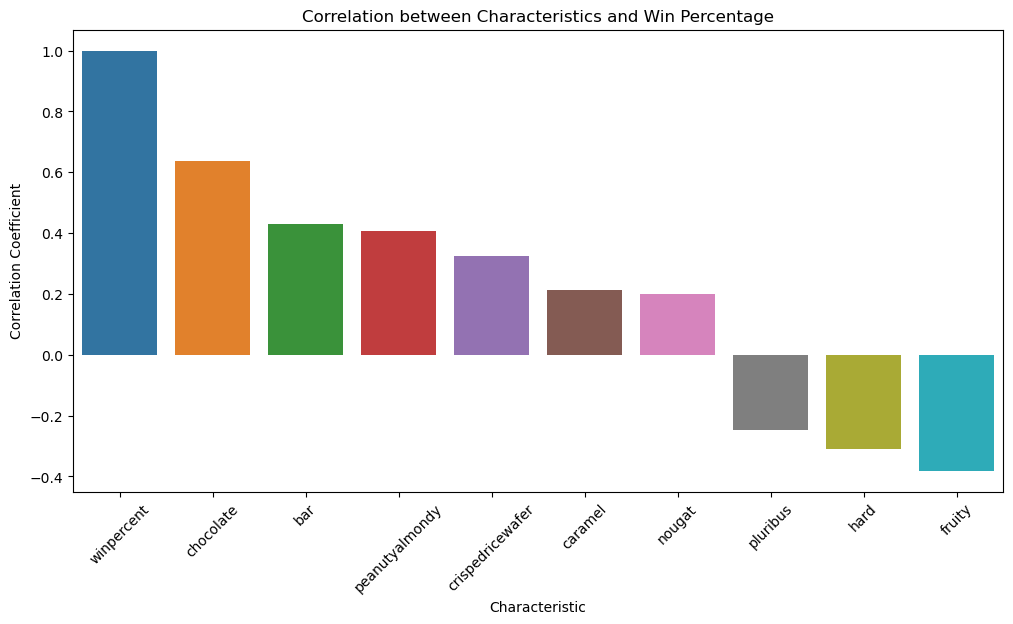

In [7]:
# Calculate correlation between characteristics and win percentage
correlations = candy_data[characteristics + ['winpercent']].corr()['winpercent'].sort_values(ascending=False)

# Create a bar plot of correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.title('Correlation between Characteristics and Win Percentage')
plt.xlabel('Characteristic')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


### Top Candies by Win Percentage

Let's start by looking at the top candies by win percentage.

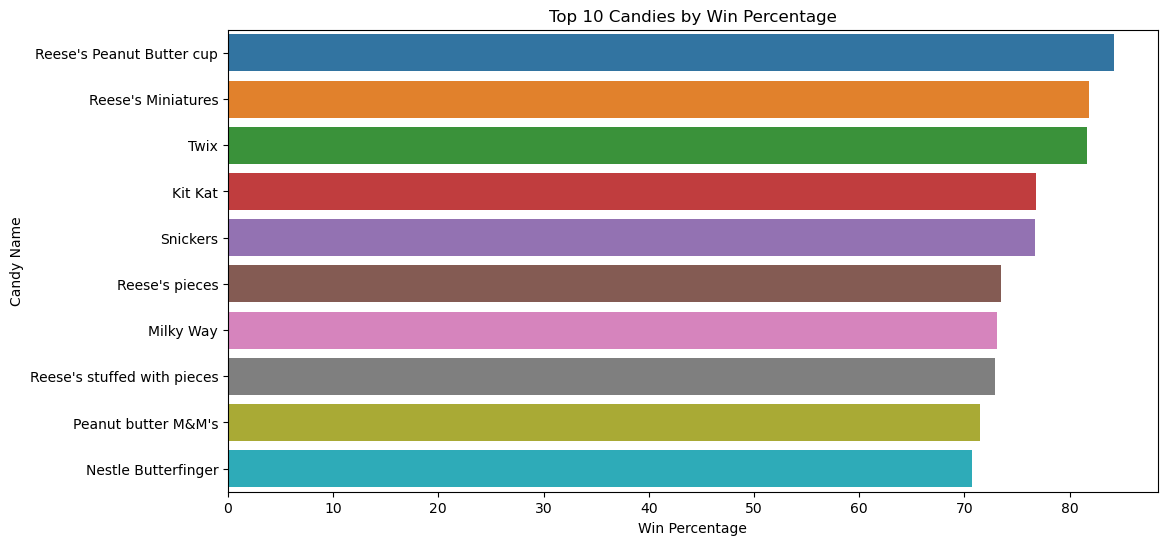

In [3]:
# Sort candies by win percentage in descending order
top_candies = candy_data.sort_values('winpercent', ascending=False).head(10)

# Create a bar plot of the top 10 candies
plt.figure(figsize=(12, 6))
sns.barplot(x='winpercent', y='competitorname', data=top_candies)
plt.title('Top 10 Candies by Win Percentage')
plt.xlabel('Win Percentage')
plt.ylabel('Candy Name')
plt.show()

Top candies by varitey considerations

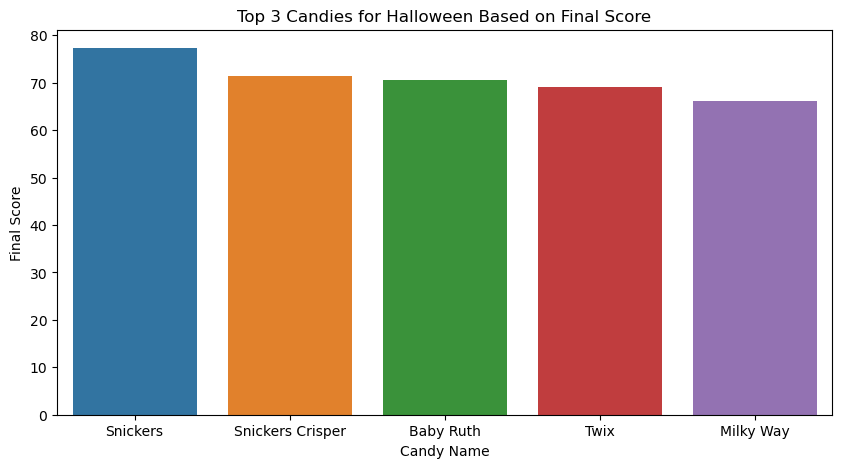

In [33]:
# Calculate feature diversity score
candy_data['feature_diversity'] = candy_data[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']].sum(axis=1)

# Adjusted weights: balancing winpercent, price, feature diversity, and sugar
candy_data['final_score'] = candy_data['winpercent'] * 0.35 + candy_data['feature_diversity'] * 10 + candy_data['pricepercent'] * 0.5 + candy_data['sugarpercent'] * 0.3

# Select the top 3 candies based on final score
top_candies = candy_data.nlargest(5, 'final_score')

# Visualization of the top candies
plt.figure(figsize=(10, 5))
sns.barplot(x='competitorname', y='final_score', data=top_candies)
plt.title('Top 3 Candies for Halloween Based on Final Score')
plt.xlabel('Candy Name')
plt.ylabel('Final Score')
plt.show()


Top candies by allergy considerations

C:\Users\Admin\AppData\Local\Temp\ipykernel_5848\2786313311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nut_free_candies['final_score'] = (


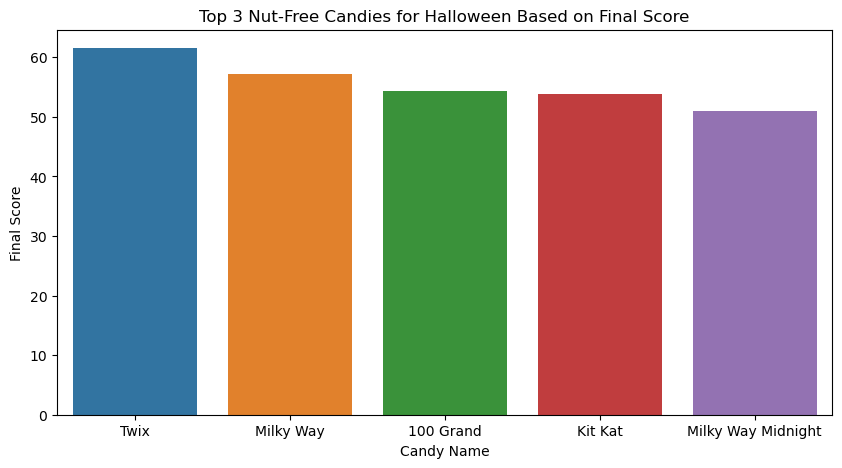

In [46]:
# Filter out candies that contain peanuts or almonds (peanutyalmondy == 1)
nut_free_candies = candy_data[candy_data['peanutyalmondy'] == 0]

# Calculate final score for nut-free candies
nut_free_candies['final_score'] = (
    nut_free_candies['winpercent'] * 0.5 +
    nut_free_candies['feature_diversity'] * 5 +
    nut_free_candies['pricepercent'] * 0.5 +
    nut_free_candies['sugarpercent'] * 0.5
)

# Select the top 3 nut-free candies based on final score
top_candies = nut_free_candies.nlargest(5, 'final_score')

# Visualization of the top 3 nut-free candies
plt.figure(figsize=(10, 5))
sns.barplot(x='competitorname', y='final_score', data=top_candies)
plt.title('Top 3 Nut-Free Candies for Halloween Based on Final Score')
plt.xlabel('Candy Name')
plt.ylabel('Final Score')
plt.show()

Top candies cosidering fruit flavored

C:\Users\Admin\AppData\Local\Temp\ipykernel_5848\1370321373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fruity_candies['final_score'] = (fruity_candies['winpercent'] * 0.5 + fruity_candies['pricepercent'] * 0.5 + fruity_candies['sugarpercent'] * 0.5)


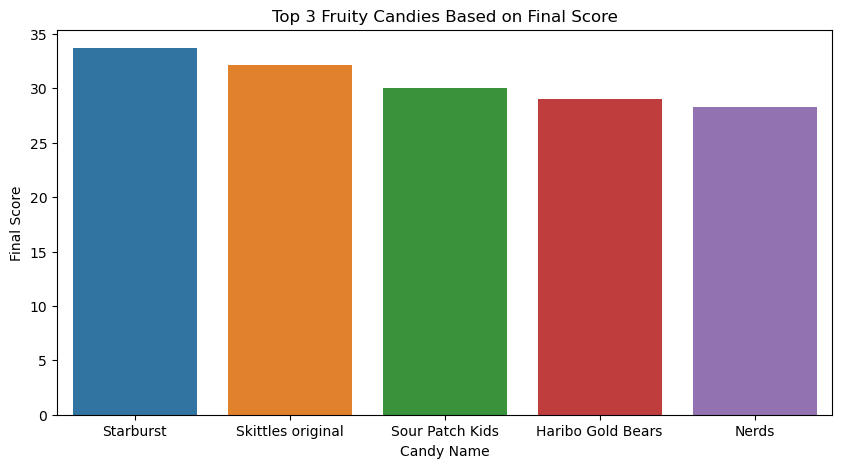

In [27]:
# Filter the dataset to include only fruity candies
fruity_candies = candy_data[candy_data['fruity'] == 1]

# Combine winpercent, pricepercent, sugarpercent, and feature diversity into a final score
fruity_candies['final_score'] = (fruity_candies['winpercent'] * 0.5 + fruity_candies['pricepercent'] * 0.5 + fruity_candies['sugarpercent'] * 0.5)

# Select the top fruity candies based on final score
top_fruity_candies = fruity_candies.nlargest(5, 'final_score')

# Visualization of the top fruity candies
plt.figure(figsize=(10, 5))
sns.barplot(x='competitorname', y='final_score', data=top_fruity_candies)
plt.title('Top 3 Fruity Candies Based on Final Score')
plt.xlabel('Candy Name')
plt.ylabel('Final Score')
plt.show()

In [43]:
# Filter for candies that are both fruity and caramel
fruity_caramel = candy_data[(candy_data['fruity'] == 1) & (candy_data['caramel'] == 1)]
fruity_caramel

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,feature_diversity,final_score
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681,2,32.424888


In [44]:
# Filter for candies that are both fruity and chocolate
fruity_chocolate = candy_data[(candy_data['fruity'] == 1) & (candy_data['chocolate'] == 1)]
fruity_chocolate

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,feature_diversity,final_score
74,Tootsie Pop,1,1,0,0,0,0,1,0,0,0.604,0.325,48.982651,3,47.487628


## Candy Selection

Based on our analysis, we'll select three candies that offer a good balance of popularity, variety, and allergy considerations.

In [11]:
selected_candies = ['Reese\'s Peanut Butter cup', 'Twix', 'Starburst']

# Create a dataframe with our selected candies
selected_df = candy_data[candy_data['competitorname'].isin(selected_candies)]

# Display information about our selected candies
print(selected_df[['competitorname', 'winpercent', 'chocolate', 'fruity', 'peanutyalmondy']])

               competitorname  winpercent  chocolate  fruity  peanutyalmondy
52  Reese's Peanut Butter cup   84.180290          1       0               1
68                  Starburst   67.037628          0       1               0
79                       Twix   81.642914          1       0               0


## Visualizing Our Selection
Radar chart to visualize how our selection covers different characteristics.

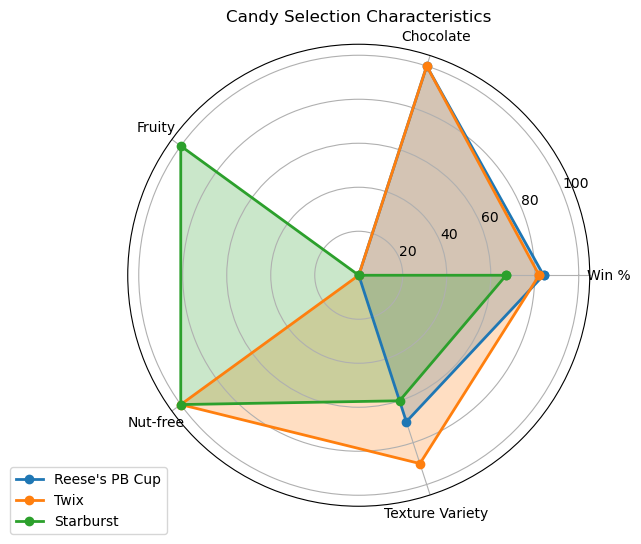

In [4]:
import numpy as np

# Prepare data for the radar chart
categories = ['Win %', 'Chocolate', 'Fruity', 'Nut-free', 'Texture Variety']
reeses_values = [84, 100, 0, 0, 70]
twix_values = [82, 100, 0, 100, 90]
starburst_values = [67, 0, 100, 100, 60]

# Set up the angles for the radar chart
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)

# Close the plot by appending the first value to the end
reeses_values += reeses_values[:1]
twix_values += twix_values[:1]
starburst_values += starburst_values[:1]
angles = np.concatenate((angles, [angles[0]]))

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='polar'))

# Plot each candy
ax.plot(angles, reeses_values, 'o-', linewidth=2, label="Reese's PB Cup")
ax.plot(angles, twix_values, 'o-', linewidth=2, label="Twix")
ax.plot(angles, starburst_values, 'o-', linewidth=2, label="Starburst")

# Fill the area
ax.fill(angles, reeses_values, alpha=0.25)
ax.fill(angles, twix_values, alpha=0.25)
ax.fill(angles, starburst_values, alpha=0.25)

# Set category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title("Candy Selection Characteristics")
plt.show()

## Conclusion

Based on our data-driven analysis, we've selected Reese's Peanut Butter cups, Twix, and Starburst as our three treats to give out on Halloween. This selection offers:

1. High overall popularity, with all three candies ranking in the top percentiles for win percentage.
2. A mix of chocolate (Reese's and Twix) and fruity (Starburst) options to cater to different taste preferences.
3. Nut-free options (Twix and Starburst) for those with allergies.
4. Variety in textures and eating experiences, from the smoothness of Reese's to the crunch of Twix and the chewiness of Starburst.

This carefully curated selection should appeal to a wide range of trick-or-treaters, making our house the most popular on the block this Halloween.